# Statistical Significance

The outcome of various statistical significance tests is a **p-value** which is used to accept or reject the null hypothesis. This hypothesis could be that two classifiers or random variables are independent and randomly distributed.

# Tree Boosting

The difference between <span style="color:blue">**Boosting**</span> and **Bagging** is that for Bagging, the views on which trees are trained are different samples and the final result is the average of all the results, while for Boosting the views are **subsequent residuals** (classification errors of previous trees) and the final aggregation is the sum of all the results.

The boosting learning process **can't be parallelized** since each tree needs the residuals of the previous one in order to be trained. This is a major difference from random forest and bagging.

Boosting parameters are:

* The **depth** of the tree ($d$), which should be quite small in order to allow trees to make errors (which is the base idea for the boosting process). A d = 0 generates trees made of a single node. In case of regression, it would contain a constant representing the average of values of data, which is not interesting.

* The **slowing parameter** $\lambda$ which avoids rapid convergence in order to allow the training of multiple trees (without that each subsequent tree would try to fix all the errors of previous trees). A value of 1 would mean "fix all the errors of previous tree": usual values are 0.01 or 0.001. 

* For small $\lambda$, the **number of generated trees** $B$ should be large (which can lead to overfitting here, because training data are not independent).

**All the three parameters interact in boosting.**

Boosting doesn't allows **confidence estimation** since the results are calculated subsequently and not independent from each other.



# Laboratory: Random Forest on Iris

In [1]:
# Import the libraries
library(dplyr)
library(ggplot2)
library(randomForest)
library(rpart)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
# removing setosa class
new_iris <- iris[iris$Species != "setosa",]

# shuffling the sample
new_iris <- new_iris[sample(nrow(new_iris)),]

# factoring the string in Species
new_iris$Species = factor(new_iris$Species)

In [3]:
# creating the whole model
rf <- randomForest(Species ~ ., data = new_iris)

print(rf)


Call:
 randomForest(formula = Species ~ ., data = new_iris) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 7%
Confusion matrix:
           versicolor virginica class.error
versicolor         47         3        0.06
virginica           4        46        0.08


In [4]:
# We see that Petal.Length and Petal.Width are the most important variables
# we could also set importance=TRUE in randomForest() and see the variable
print(importance(rf, type=2))

             MeanDecreaseGini
Sepal.Length         4.194823
Sepal.Width          1.432931
Petal.Length        21.292181
Petal.Width         22.563692


In [5]:
#learning partial models to prove they are less effective
rf_nopl <- randomForest(Species ~ . - Petal.Length, data = new_iris)
rf_nopw <- randomForest(Species ~ . - Petal.Width, data = new_iris)
rf_noplpw <- randomForest(Species ~ . - Petal.Length - Petal.Width, data = new_iris)

# Interesting to note how the classification error increases only for one class when
# removing a single important variable.
print(rf_nopl)
print(rf_nopw)
print(rf_noplpw)


Call:
 randomForest(formula = Species ~ . - Petal.Length, data = new_iris) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 8%
Confusion matrix:
           versicolor virginica class.error
versicolor         47         3        0.06
virginica           5        45        0.10

Call:
 randomForest(formula = Species ~ . - Petal.Width, data = new_iris) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 10%
Confusion matrix:
           versicolor virginica class.error
versicolor         44         6        0.12
virginica           4        46        0.08

Call:
 randomForest(formula = Species ~ . - Petal.Length - Petal.Width,      data = new_iris) 
               Type of random forest: classification
                     Number of trees: 500
No.

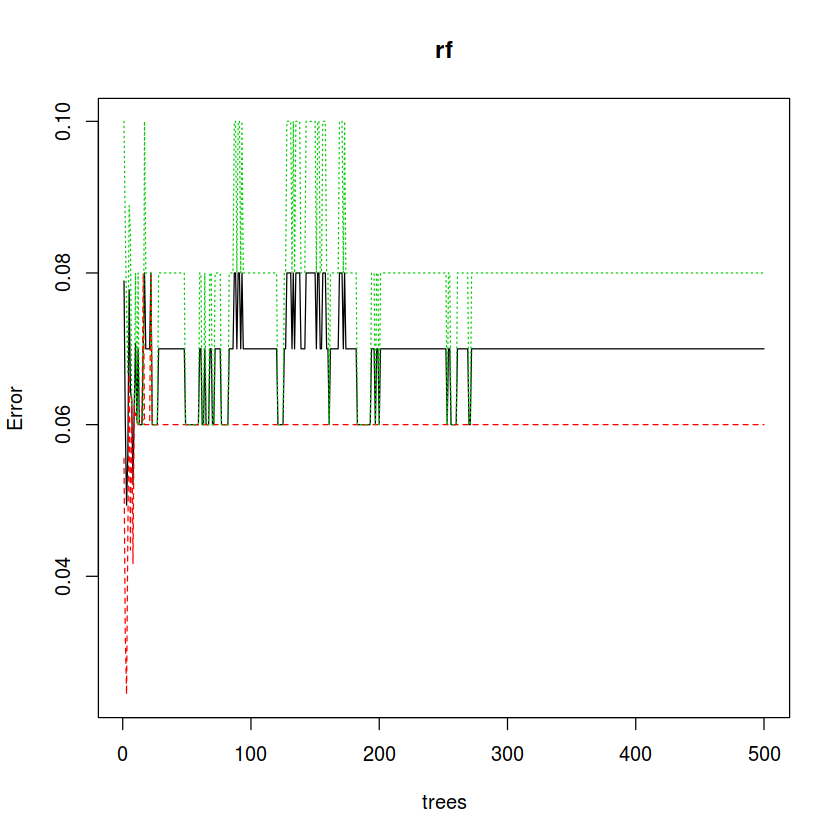

In [6]:
# We can see from the plot that error stabilizes when B is high
plot(rf)

In [7]:
# Rpart uses integrated cross-validation
dt <- rpart(Species ~ ., data = new_iris)
# xerror is 0.12, while OOB error is 0.07
# class errors are 0.06 and 0.08 for RF, 0.09 and 0.02 for DT 
printcp(dt)


Classification tree:
rpart(formula = Species ~ ., data = new_iris)

Variables actually used in tree construction:
[1] Petal.Width

Root node error: 50/100 = 0.5

n= 100 

    CP nsplit rel error xerror     xstd
1 0.88      0      1.00   1.28 0.096000
2 0.01      1      0.12   0.22 0.062578


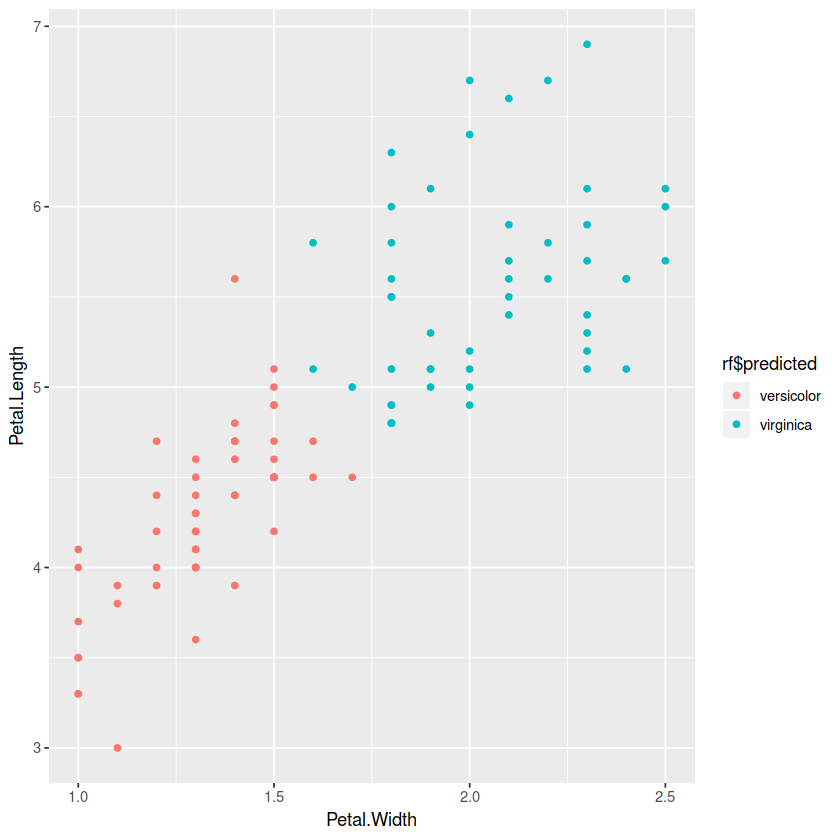

In [10]:
#print decision boundaries
ggplot(data = new_iris, aes(x=Petal.Width, y=Petal.Length, color=rf$predicted)) +
geom_point()

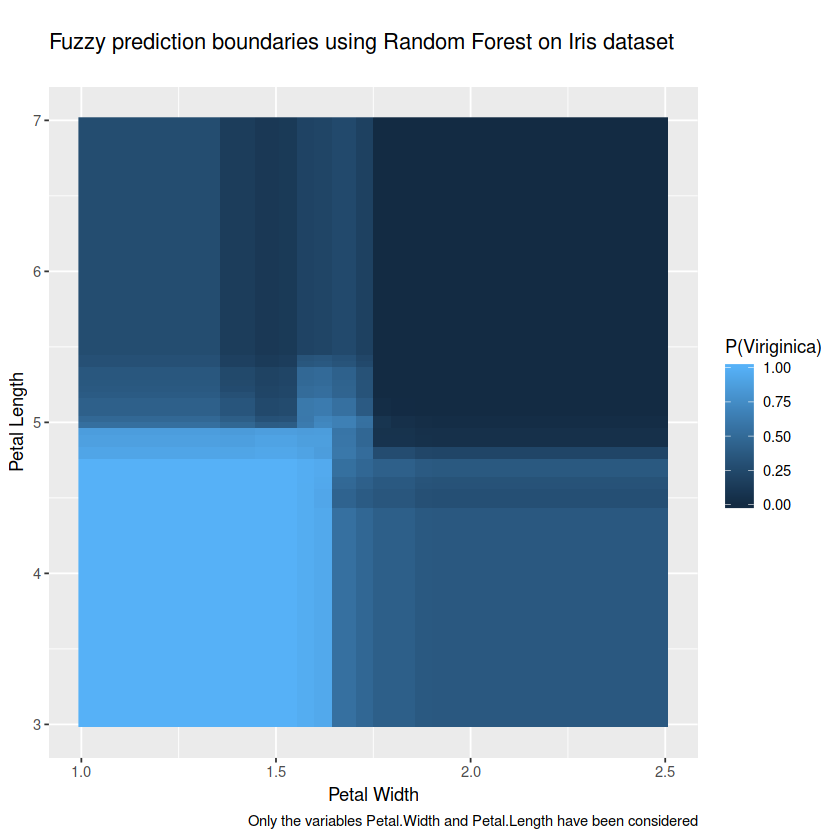

In [12]:
# Visualizing prediction through fuzzy plots
plane_iris = expand.grid(Petal.Length = seq(3.0, 7.0, length.out=100), 
                         Petal.Width = seq(1.0, 2.5, length.out=100))

rf_plpw <- randomForest(Species ~ Petal.Length + Petal.Width, data = new_iris)

pred <- predict(rf_plpw, plane_iris, type="prob")

ggplot(data = plane_iris, aes(x=Petal.Width, y=Petal.Length, fill=pred[,1])) +
  geom_raster() +
  labs(fill = "P(Viriginica)", 
       x="Petal Width", 
       y="Petal Length", 
       title="\nFuzzy prediction boundaries using Random Forest on Iris dataset\n",
       caption="Only the variables Petal.Width and Petal.Length have been considered")

